# Principal Component Analysis

INFO 371 Spring 2018

Lab created by: Christie Gan

Deadline: 5/9/18 11:59PM

Last Edit: 5/7/2018

There are two main purposes for PCA: simplify/speed up machine learning computation, and help create data visualizations. In this lab, we'll be focusing on the visualization part. Even though there are packages that already can create these visuals easily (seaborn), we'll recreate the visual but with the most optimized features by using PCA. The benefit of using PCA is that it can take all the features and generate its own main dimensions of variation, rather than using the features given. The features themselves can be limiting, so to have calculated features is better when you want to reduce the dimensions. We will be using the iris dataset again.

If you want to learn more about the concept of PCA, this is a great link: https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

In [2]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Load the iris dataset 
iris = datasets.load_iris()

### 1.) Turn the dataset into a dataframe

In [4]:
iris_df = pd.DataFrame(columns=iris.feature_names, data=iris.data)
iris_df['outcome'] = iris.target


### 2.) We have to standardize the data given. Scale the features in the dataset by using StandardScaler. Standardizing the features onto a unit scale signifies mean = 0 and variance = 1.

In [5]:
#hints
#seperate out the features in the dataframe
#use fit_transform
df_features = iris_df.drop(['outcome'], axis = 1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_features)

### 3.) Now we want to do PCA projection to 2D. Project the original 4 dimensions (columns) into 2 dimensions. This is known as dimensionality reduction. The two new "features" are just two main dimensions of variation. Set these two and the target column into a new dataframe

In [6]:
#hint
#PCA(n_components=2)
pca = PCA(n_components=2)
data_new = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame( columns=["F1", "F2"], data=data_new)
pca_df['outcome'] = iris_df.outcome


### 4.) Even though originally there were four features, PCA projection turns them into two dimensions and makes it easier to plot the classification all in one graph. Plot the 2 dimensional data. 

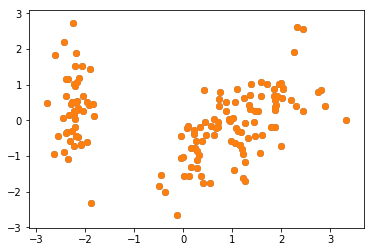

In [27]:
plt.scatter(pca_df.F1, pca_df.F2)
plt.show()

### 5.) Plot the culminative explained variance ratio vs number of components on a line graph.

A part of using PCA is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the culminative explained variance ratio as a function of the number of components

In [31]:
pca1 = PCA(n_components=1)
f1 = pca1.fit(data_scaled)
vr1 = np.cumsum(pca1.explained_variance_ratio_ )

pca2 = PCA(n_components=2)
f2 = pca2.fit(data_scaled)
vr2 = np.cumsum(pca2.explained_variance_ratio_ )

pca3 = PCA(n_components=3)
f3 = pca3.fit(data_scaled)
vr3 = np.cumsum(pca3.explained_variance_ratio_ )

pca4 = PCA(n_components=4)
f4 = pca4.fit(data_scaled)
vr4 = np.cumsum(pca4.explained_variance_ratio_ )

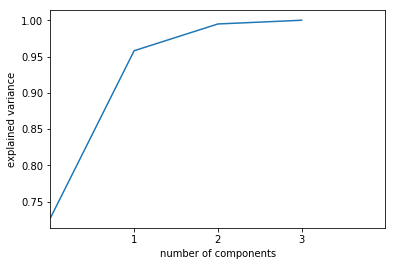

In [14]:
plt.xlim(0,4)
plt.xticks([1,2,3])
pca=PCA().fit(data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

C:\Users\maryh\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


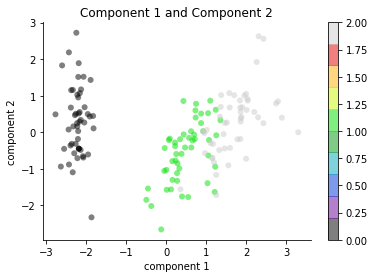

In [16]:
plt.scatter(pca_df['F1'], pca_df['F2'],
            c=pca_df.outcome, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Component 1 and Component 2")
plt.colorbar();
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()